train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.<br>
<br>
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br>
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.<br>
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br>
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>
Destination - The planet the passenger will be debarking to.<br>
Age - The age of the passenger.<br>
VIP - Whether the passenger has paid for special VIP service during the voyage.<br>
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>
Name - The first and last names of the passenger.<br>
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>
test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid',font_scale=1.4)
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_records=train.shape
test_records=test.shape
print(f"No of records in Train dataset are {train_records} rows")
print(f"No of records in Test dataset are {test_records} rows")

No of records in Train dataset are (8693, 14) rows
No of records in Test dataset are (4277, 13) rows


In [6]:
#Missing Values
print("Train Set Missing Values")
print(train.isna().sum())
print("*"*150)
print(' ')
print("Test Set Missing Values")
print(test.isna().sum())

Train Set Missing Values
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
******************************************************************************************************************************************************
 
Test Set Missing Values
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [7]:
#Check for Duplicates
print(f'Duplicates in Train Set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print(f'Duplicates in Test Set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in Train Set: 0, (0.0%)
Duplicates in Test Set: 0, (0.0%)


In [8]:
#Check the Cardinality
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [9]:
#Data types
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### EDA

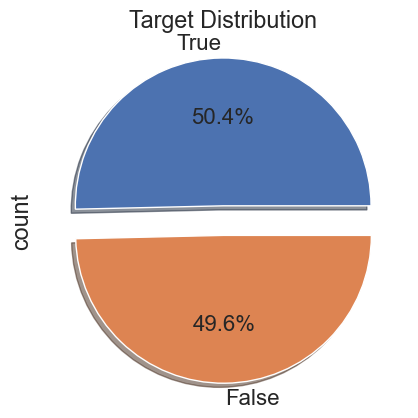

In [10]:
#Target distribution
train['Transported'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0.1],textprops={'fontsize':16}).set_title('Target Distribution')
plt.show()

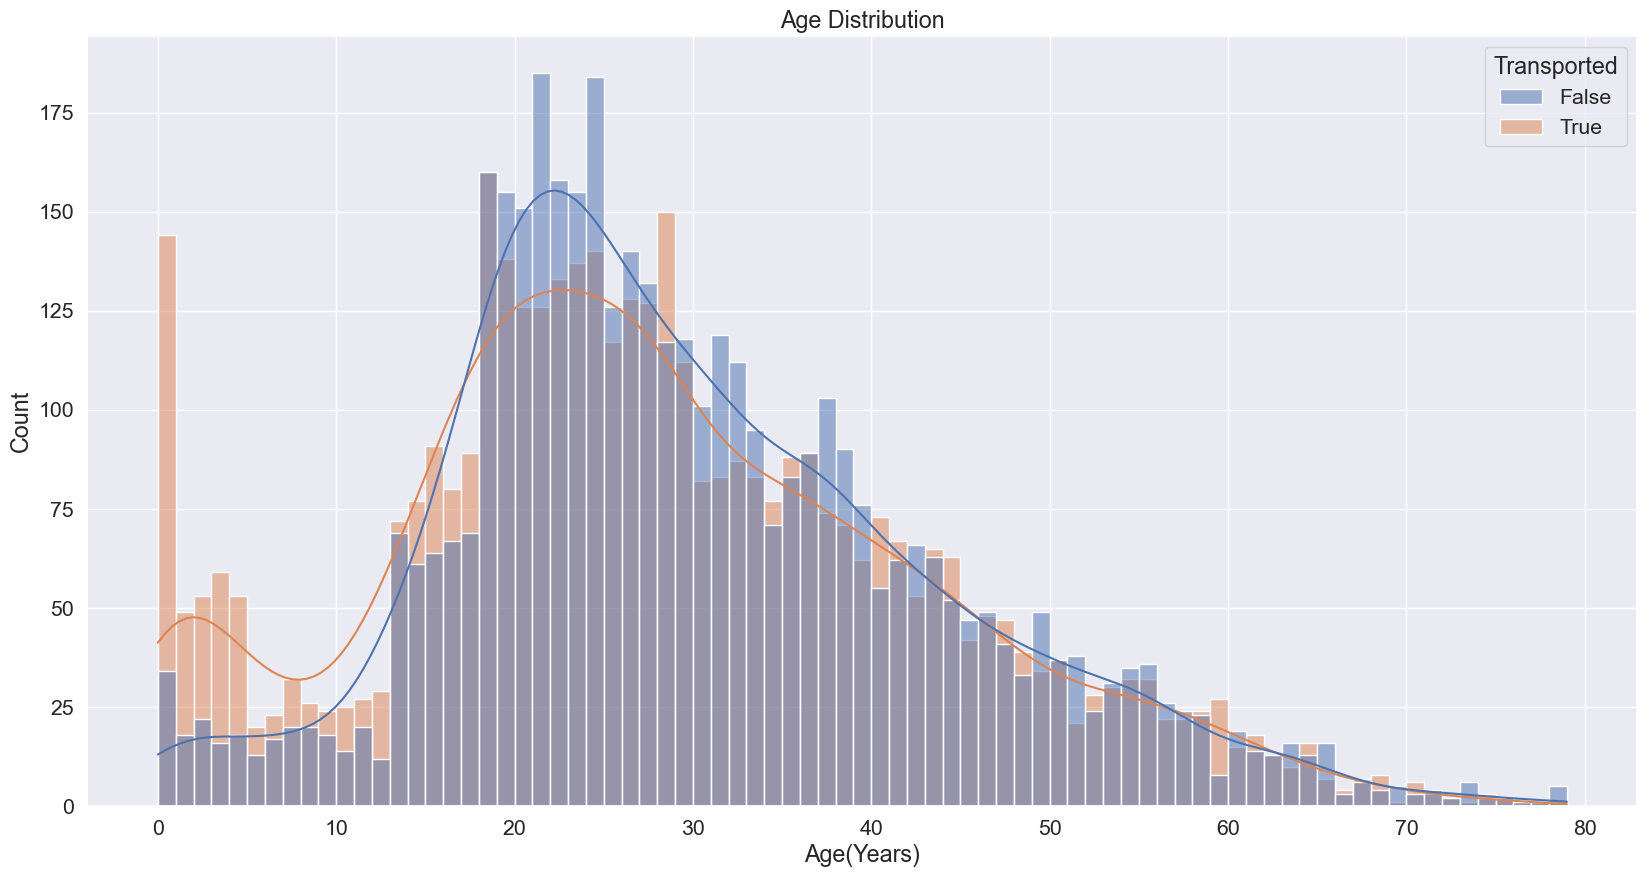

In [19]:
#Continious Variables
plt.figure(figsize=(20,10))
sns.histplot(x='Age',hue='Transported',data=train,kde=True,binwidth=1)
plt.title('Age Distribution')
plt.xlabel('Age(Years)')
plt.show()


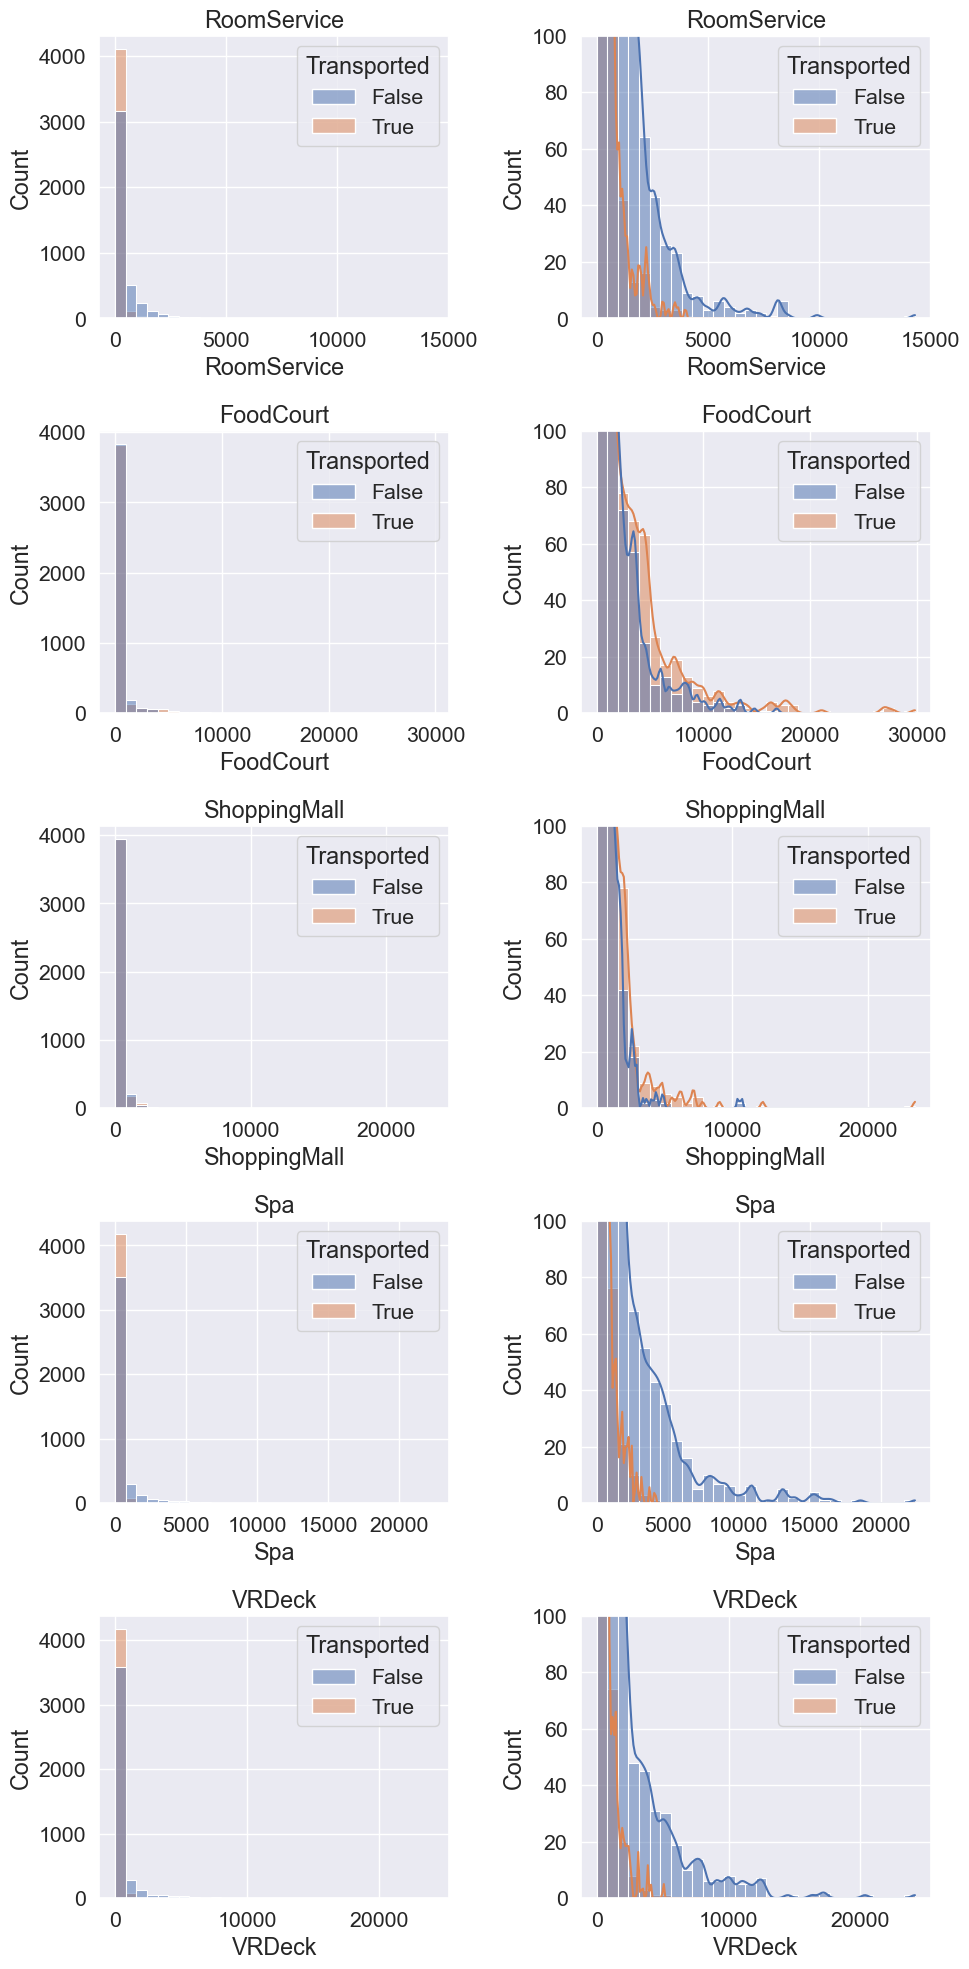

In [25]:
#Expenditure Features
#RoomService,FoodCourt,ShoppingMall,Spa,VRDeck 
expenditure_features=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
fig=plt.figure(figsize=(10,20))
for i,varname in enumerate(expenditure_features):
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(x=varname,hue='Transported',data=train,bins=30,kde=False,axes=ax)
    ax.set_title(varname)
    
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(x=varname,hue='Transported',data=train,bins=30,kde=True,axes=ax)
    plt.ylim([0,100])
    ax.set_title(varname)    
fig.tight_layout()
plt.show()        